In [1]:
# default_exp china
# 上面一行用于nbdev中声明本模块的名称。必须是notebook的第一个Cell的第一行。

# china_balance

- 描述：抗击新冠病毒（7）-# 全国治愈与新增病例平衡分析。
- 功能：载入data/china.csv文件,进行绘图输出和分析。
- 模块：使用JupyterLab、Python、nbdev等完成。用到的Python模块包括：
  - re，正则表达式解析。
  - json，JSON格式解析。
  - pandas，数据表格分析。
- 数据来源：http://www.nhc.gov.cn/xcs/yqtb/list_gzbd.shtml
- [源码-https://github.com/openthings/anti2020ncov](https://github.com/openthings/anti2020ncov)
- 参考：
  - [JupyterLab-数据实验室](https://my.oschina.net/u/2306127?q=jupyterlab)
  - [文学式编程-nbdev入门教程](https://my.oschina.net/u/2306127/blog/3163740)
  - [Pandas快速入门](https://nbviewer.jupyter.org/github/supergis/git_notebook/blob/master/pystart/pandas_quickstart.ipynb)
    - 更多参考: https://my.oschina.net/u/2306127?q=pandas
  - [抗击新冠病毒（1）-开源软件与数据项目](https://my.oschina.net/u/2306127/blog/3162141)
  - [抗击新冠病毒（2）-基于Jupyter+nbdev的数据分析](https://my.oschina.net/u/2306127/blog/3164083)
  - [抗击新冠病毒（3）-探索在线数据资源](https://my.oschina.net/u/2306127/blog/3164744)
  - [抗击新冠病毒（4）-获取并保存在线数据](https://my.oschina.net/u/2306127/blog/3164889)
  - [抗击新冠病毒（5）-使用pandas进行数据分析](https://my.oschina.net/u/2306127/blog/3164894)
  - [抗击新冠病毒（6）-全国总体情况分析](https://my.oschina.net/u/2306127/blog/3164949)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import *  

In [3]:
china = pd.read_csv("./data/china.csv")
china = china.sort_values(by='日期')

In [4]:
china_t = china
china_t['平衡']=china['新增确诊']-(china['新增治愈']+china['新增死亡'])

#### 趋势图绘制

In [5]:
# 绘制增加量趋势图 
def drawb(dfx):
    myfont = FontProperties(fname='/usr/share/fonts/truetype/arphic/ukai.ttc',size=24)  
    fig=plt.figure(figsize=(48,12), dpi=250)
    p1=fig.add_subplot(1,1,1)
    p1.set_xticklabels(dfx['日期'], rotation=15, fontsize='small',fontproperties=myfont)

    #显示数据。
    p1.plot(dfx['日期'],dfx['平衡'],color='blue',linewidth=3,label='平衡【新增确诊-(新增治愈+新增死亡)】')
    p1.plot(dfx['日期'],dfx['新增确诊'],color='#BB0000',linewidth=1,label='新增确诊')
    p1.plot(dfx['日期'],dfx['现有确诊'],color='red',linewidth=1,label='现有确诊')
    p1.plot(dfx['日期'],dfx['新增治愈'],color='green',linewidth=1,label='新增治愈')

    p1.bar(dfx['日期'],dfx['新增死亡'],color='black',label='新增死亡')

    plt.title(u'全国病例(COVID-2019)增减数量平衡-2020年01-02月,数据来源：http://www.nhc.gov.cn/xcs/yqtb/list_gzbd.shtml',fontproperties=myfont) 
    plt.legend(loc=0,ncol=1,prop=myfont)
    plt.grid(True)
    plt.gcf().autofmt_xdate()
    plt.show()
    
def drawb1(dfx):
    myfont = FontProperties(fname='/usr/share/fonts/truetype/arphic/ukai.ttc',size=24)  
    fig=plt.figure(figsize=(48,12), dpi=250)
    p1=fig.add_subplot(1,1,1)
    p1.set_xticklabels(dfx['日期'], rotation=15, fontsize='small',fontproperties=myfont)

    #显示数据。
    p1.plot(dfx['日期'],dfx['平衡'],color='blue',linewidth=3,label='平衡【新增确诊-(新增治愈+新增死亡)】')

    plt.title(u'全国病例(COVID-2019)增减数量平衡-2020年01-02月,数据来源：http://www.nhc.gov.cn/xcs/yqtb/list_gzbd.shtml',fontproperties=myfont) 
    plt.legend(loc=0,ncol=1,prop=myfont)
    plt.grid(True)
    plt.gcf().autofmt_xdate()
    plt.show()

In [6]:
china_t[15:]

,日期,新增确诊,新增重症,新增死亡,新增疑似,新增治愈,解除观察,现有确诊,累计确诊,累计治愈,累计死亡,现有疑似,密切接触,医学观察,平衡
22,2020-02-06,3143,962,73,4833,387,26762,28985,31161,1540,636,26359,314028,186045,2683
21,2020-02-07,3399,1280,86,4214,510,26702,31774,34546,2050,722,27657,345498,189660,2803
20,2020-02-08,2656,87,89,3916,600,31124,33738,37198,2649,811,28942,371905,188183,1967
19,2020-02-09,3062,296,97,4008,632,29307,35982,40171,3281,908,23589,399487,187518,2333
18,2020-02-10,2478,849,108,3536,716,26724,37626,42638,3996,1016,21675,428438,187728,1654
17,2020-02-11,2015,871,97,3342,744,30068,38800,44653,4740,1113,16067,451462,185037,1174
16,2020-02-12,15152,-174,254,2807,1171,29429,52526,59804,5911,1367,13435,471531,181386,13727
15,2020-02-13,5090,2174,121,2450,1081,26905,55748,63851,6723,1380,10109,493067,177984,3888
14,2020-02-14,2641,849,143,2277,1373,30081,56873,66492,8096,1523,8969,513183,169039,1125
13,2020-02-15,2009,219,142,1918,1323,29788,57416,68500,9419,1665,8228,529418,158764,544


#### 全国病例(COVID-2019)数量平衡-2020年01-02月

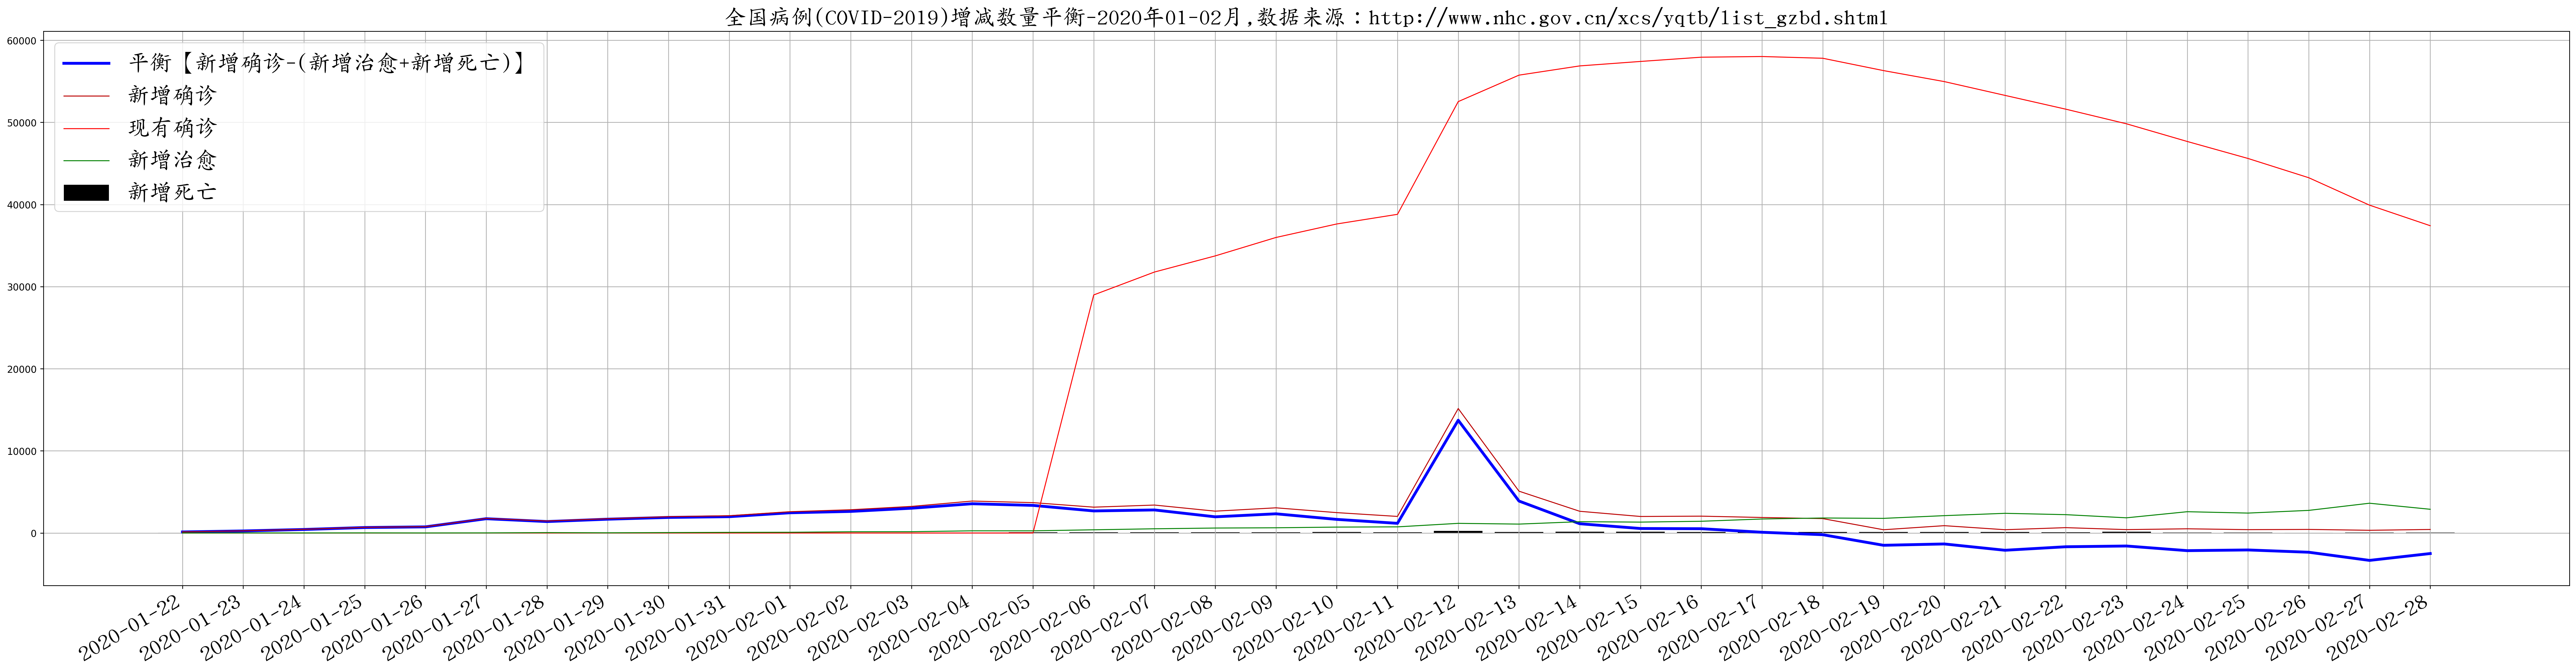

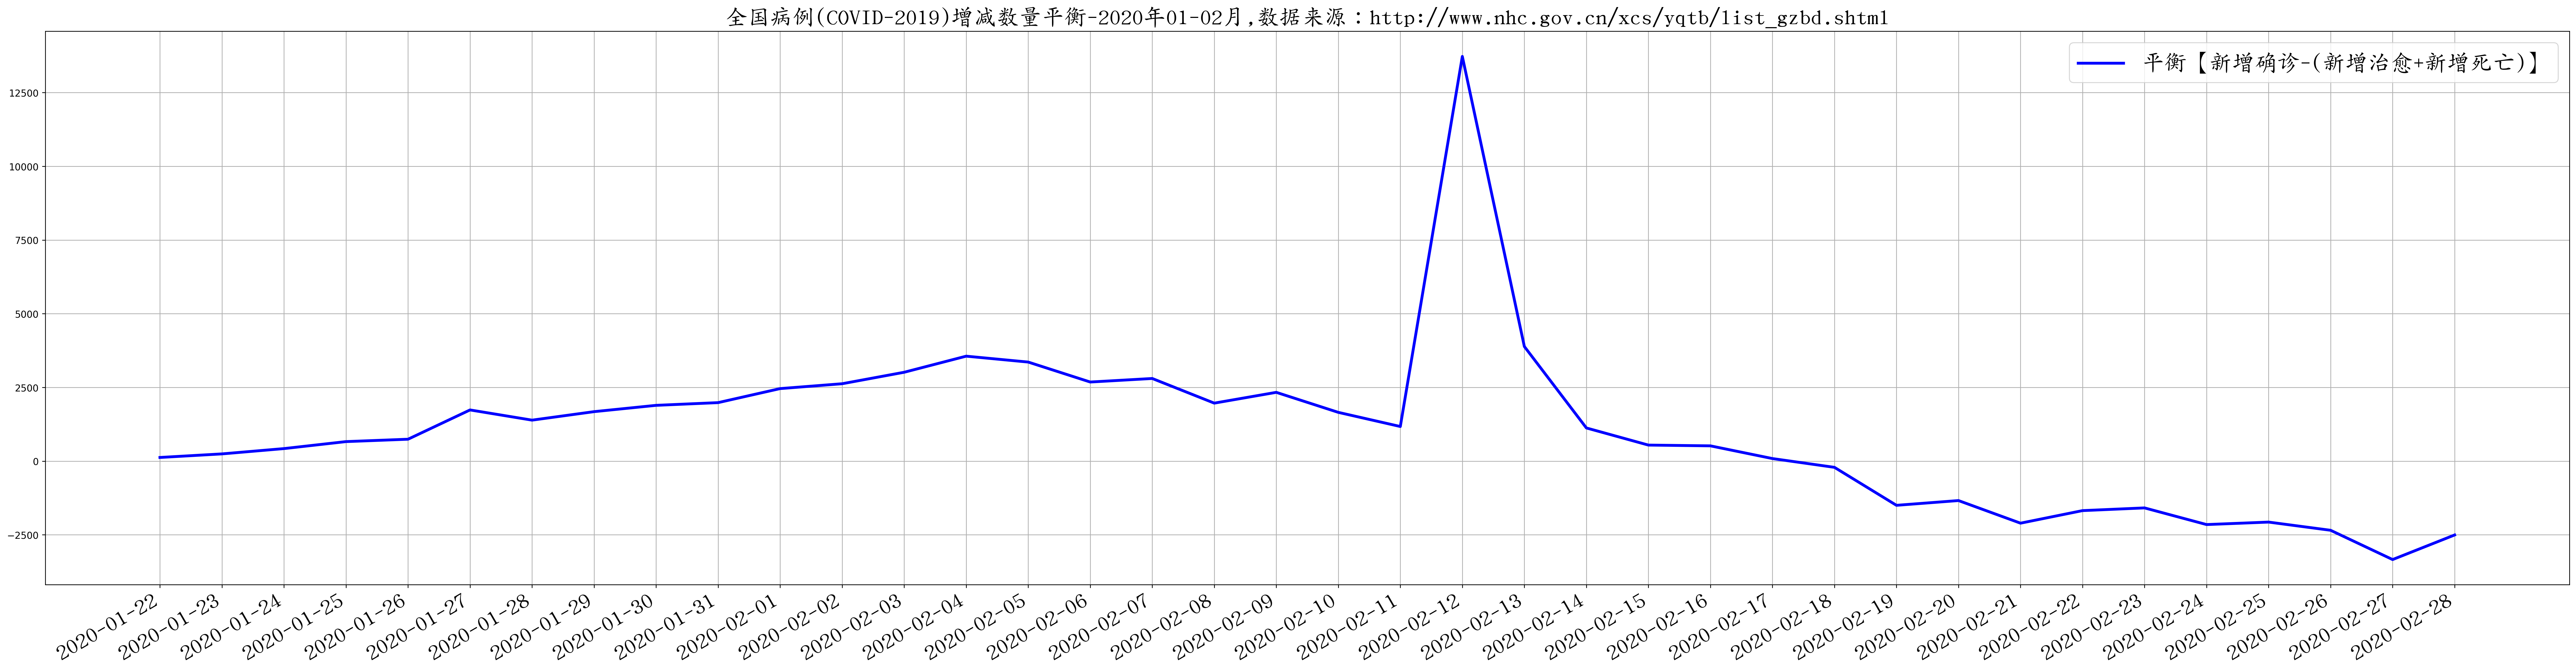

In [7]:
drawb(china)
drawb1(china)